## Required LIbrararies ##

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer

 # Attributes Considered as inputs are: #
- ## *raisedhands-->Turned on mic/asked for doubts* ##
- ## *VisitedResources-->ClassRoom Visites* ##
- ## *AnnouncementsView-->Material views/gone through tasks* ##
- ## *Discussion-->RespondedThoughChats* ##
- ## *StudentAbsenceDays--> Absence days per week(7-days)* ##


Reading Source Data|

In [35]:
students=pd.read_csv('StudentsData.csv')
students

,Unnamed: 0.1,Unnamed: 0,gender,NationalITy,PlaceofBirth,GradeID,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,0,0,M,KW,KuwaIT,G-04,F,15,16,2,20,Under-4
1,1,1,M,KW,KuwaIT,G-04,F,20,20,3,25,Under-4
2,2,2,M,KW,KuwaIT,G-04,F,10,7,0,30,Above-4
3,3,3,M,KW,KuwaIT,G-04,F,30,25,5,35,Above-4
4,4,4,M,KW,KuwaIT,G-04,F,40,50,12,50,Above-4
...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,475,F,Jordan,Jordan,G-08,S,5,4,5,8,Above-4
476,476,476,F,Jordan,Jordan,G-08,F,50,77,14,28,Under-4
477,477,477,F,Jordan,Jordan,G-08,S,55,74,25,29,Under-4
478,478,478,F,Jordan,Jordan,G-08,F,30,17,14,57,Above-4


In [36]:
students.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'gender', 'NationalITy', 'PlaceofBirth',
       'GradeID', 'Semester', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion', 'StudentAbsenceDays'],
      dtype='object')

In [37]:
students=students.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1)
students

,gender,NationalITy,PlaceofBirth,GradeID,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,M,KW,KuwaIT,G-04,F,15,16,2,20,Under-4
1,M,KW,KuwaIT,G-04,F,20,20,3,25,Under-4
2,M,KW,KuwaIT,G-04,F,10,7,0,30,Above-4
3,M,KW,KuwaIT,G-04,F,30,25,5,35,Above-4
4,M,KW,KuwaIT,G-04,F,40,50,12,50,Above-4
...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,G-08,S,5,4,5,8,Above-4
476,F,Jordan,Jordan,G-08,F,50,77,14,28,Under-4
477,F,Jordan,Jordan,G-08,S,55,74,25,29,Under-4
478,F,Jordan,Jordan,G-08,F,30,17,14,57,Above-4


In [38]:
def change(e):
    if(e=='Under-4'):
        return np.random.randint(0,4)
    else:
        return np.random.randint(4,8)

students.StudentAbsenceDays=students.StudentAbsenceDays.apply(change)

In [39]:
students

,gender,NationalITy,PlaceofBirth,GradeID,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,M,KW,KuwaIT,G-04,F,15,16,2,20,0
1,M,KW,KuwaIT,G-04,F,20,20,3,25,1
2,M,KW,KuwaIT,G-04,F,10,7,0,30,6
3,M,KW,KuwaIT,G-04,F,30,25,5,35,5
4,M,KW,KuwaIT,G-04,F,40,50,12,50,5
...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,G-08,S,5,4,5,8,4
476,F,Jordan,Jordan,G-08,F,50,77,14,28,2
477,F,Jordan,Jordan,G-08,S,55,74,25,29,2
478,F,Jordan,Jordan,G-08,F,30,17,14,57,5


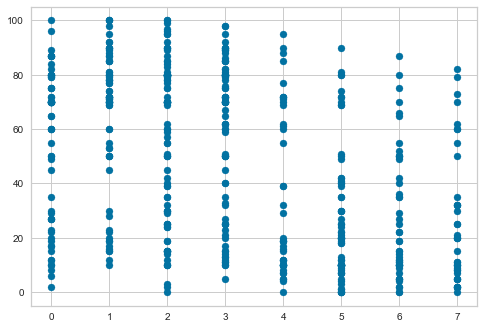

In [40]:
plt.scatter(students['StudentAbsenceDays'],students['raisedhands'])

In [41]:
def change(e):
    if(e['StudentAbsenceDays']==7):
        return 0
    else:
        return e['raisedhands']

students.raisedhands=students.apply(change,axis=1)
students

,gender,NationalITy,PlaceofBirth,GradeID,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,M,KW,KuwaIT,G-04,F,15,16,2,20,0
1,M,KW,KuwaIT,G-04,F,20,20,3,25,1
2,M,KW,KuwaIT,G-04,F,10,7,0,30,6
3,M,KW,KuwaIT,G-04,F,30,25,5,35,5
4,M,KW,KuwaIT,G-04,F,40,50,12,50,5
...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,G-08,S,5,4,5,8,4
476,F,Jordan,Jordan,G-08,F,50,77,14,28,2
477,F,Jordan,Jordan,G-08,S,55,74,25,29,2
478,F,Jordan,Jordan,G-08,F,30,17,14,57,5


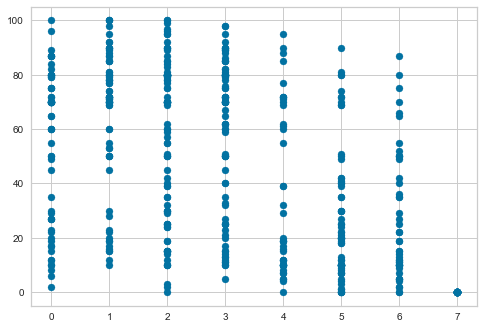

In [42]:
plt.scatter(students['StudentAbsenceDays'],students['raisedhands'])

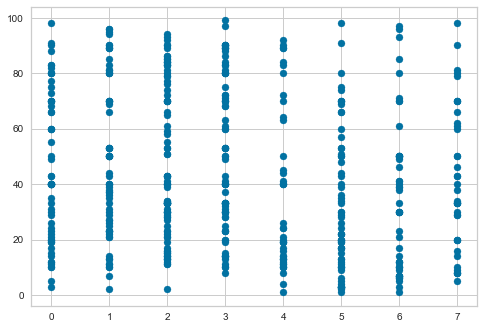

In [43]:
plt.scatter(students.StudentAbsenceDays,students.Discussion)

In [44]:
def change(e):
    if(e['StudentAbsenceDays']==7):
        return 0
    else:
        return e['Discussion']

students.Discussion=students.apply(change,axis=1)
students

,gender,NationalITy,PlaceofBirth,GradeID,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays
0,M,KW,KuwaIT,G-04,F,15,16,2,20,0
1,M,KW,KuwaIT,G-04,F,20,20,3,25,1
2,M,KW,KuwaIT,G-04,F,10,7,0,30,6
3,M,KW,KuwaIT,G-04,F,30,25,5,35,5
4,M,KW,KuwaIT,G-04,F,40,50,12,50,5
...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,G-08,S,5,4,5,8,4
476,F,Jordan,Jordan,G-08,F,50,77,14,28,2
477,F,Jordan,Jordan,G-08,S,55,74,25,29,2
478,F,Jordan,Jordan,G-08,F,30,17,14,57,5


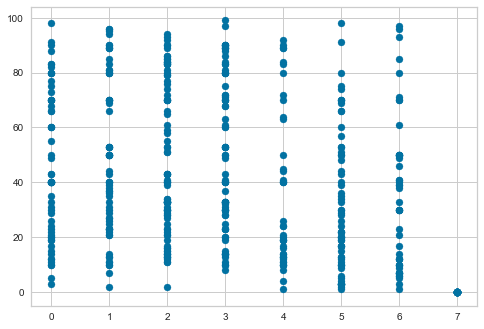

In [45]:
plt.scatter(students.StudentAbsenceDays,students.Discussion)

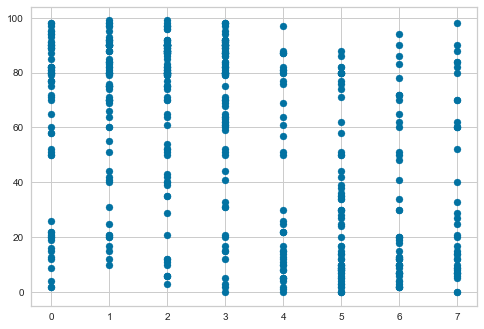

In [46]:
plt.scatter(students.StudentAbsenceDays,students.VisITedResources)

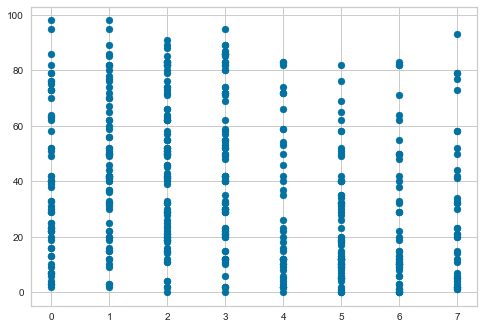

In [47]:
plt.scatter(students.StudentAbsenceDays,students.AnnouncementsView)

## By here we have completed data pre processing and now we move on to machine learning model 

# ELBOW POINT VISUALIZER

In [48]:
x=[]
for k in range(1,50):
    km=KMeans(n_clusters=k)
    km.fit_predict(students[['raisedhands','VisITedResources','AnnouncementsView', 'Discussion','StudentAbsenceDays']])
    x.append(km.inertia_)
    print(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


1769351.7562499996
906724.1970244715
677951.8027352393
566472.3258474509
461796.3622201437
415197.99535153
373475.1168705403
345865.7163409985
317189.34410264884
300775.0693498823
280152.8056058315
267537.59801095683
251574.09645545596
239249.89922086522
226798.5869668231
224457.67739869194
209874.94937248185
204155.4783184094
194908.54802205967
188356.00195605872
177798.09147043724
176703.51683512994
170858.4168045897
165106.33516997795
163761.6070131747
156315.34527745843
155418.47926868865
152866.97914703077
146225.7448545259
142838.09770832618
141074.53654938625
136502.44512495416
132878.14776919733
131817.36774107534
127064.3739512129
126105.13828747655
123755.77188100191
120181.58628660934
118895.84348741791
116126.65655767583
116276.25803208229
110826.56285036518
110323.77798865587
108187.20700090972
107650.25883032766
105776.79749750502
103835.95731870785
100629.7559859223
99968.7504504604


49


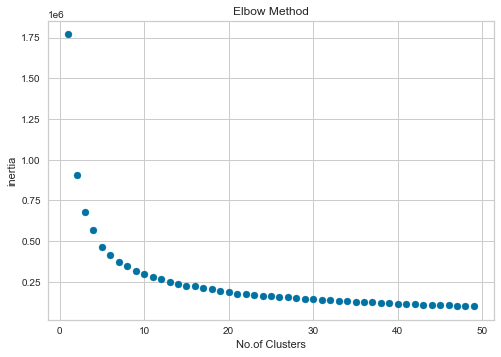

In [49]:
print(len(x))
plt.title('Elbow Method')
plt.ylabel('inertia')
plt.xlabel('No.of Clusters')
plt.scatter(range(1,50),x)

## Here using the above plotted graph we need to get the comparable best k value that is elbow point as shown below

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


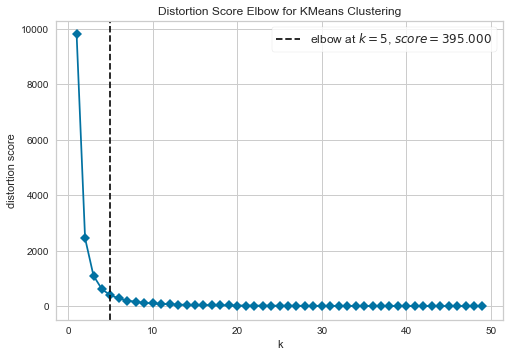

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
model = km
visualizer = KElbowVisualizer(
    model, k=(1,50), locate_elbow=True,timings=False
)
x_axis=list(range(1,50))
y_axis=x
df=pd.DataFrame(x_axis,y_axis)
visualizer.fit(X=df)
visualizer.show()  

In [51]:
km=KMeans(n_clusters=visualizer.elbow_value_)

In [52]:
students['class']=km.fit_predict(students[['raisedhands','VisITedResources','AnnouncementsView', 'Discussion','StudentAbsenceDays']])

In [25]:
students

,gender,NationalITy,PlaceofBirth,GradeID,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,class
0,M,KW,KuwaIT,G-04,F,15,16,2,20,1,3
1,M,KW,KuwaIT,G-04,F,20,20,3,25,3,3
2,M,KW,KuwaIT,G-04,F,10,7,0,30,4,3
3,M,KW,KuwaIT,G-04,F,0,25,5,0,7,3
4,M,KW,KuwaIT,G-04,F,40,50,12,50,6,2
...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,G-08,S,5,4,5,8,4,3
476,F,Jordan,Jordan,G-08,F,50,77,14,28,2,1
477,F,Jordan,Jordan,G-08,S,55,74,25,29,3,1
478,F,Jordan,Jordan,G-08,F,30,17,14,57,4,2


In [53]:
mi=100000000
df='x'
for i in range(visualizer.elbow_value_):
    df1=students[students['class']==i]
    temp=df1.mean().sum()
    print(temp,len(df1))
    if(mi>temp):
        mi=temp
        df=df1
mi

154.58620689655172 58
59.82203389830509 118
305.3391304347826 115
222.37931034482756 116
146.54794520547944 73


C:\Users\prasa\AppData\Local\Temp\ipykernel_7112\1322567829.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  temp=df1.mean().sum()


59.82203389830509

In [54]:

dropoutClass=df['class'].mean()
print(int(dropoutClass))
df

1


,gender,NationalITy,PlaceofBirth,GradeID,Semester,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,class
0,M,KW,KuwaIT,G-04,F,15,16,2,20,0,1
1,M,KW,KuwaIT,G-04,F,20,20,3,25,1,1
2,M,KW,KuwaIT,G-04,F,10,7,0,30,6,1
3,M,KW,KuwaIT,G-04,F,30,25,5,35,5,1
6,M,KW,KuwaIT,G-07,F,35,12,0,17,6,1
...,...,...,...,...,...,...,...,...,...,...,...
428,M,Jordan,SaudiArabia,G-08,F,10,0,2,41,4,1
468,F,Jordan,Jordan,G-08,F,0,9,14,0,7,1
474,F,Jordan,Jordan,G-08,F,0,7,4,0,7,1
475,F,Jordan,Jordan,G-08,S,5,4,5,8,4,1


In [57]:
def change(e):
    return e.raisedhands+ e.VisITedResources+e.AnnouncementsView +e.Discussion+e.StudentAbsenceDays

students['total']=students.apply(change, axis=1)

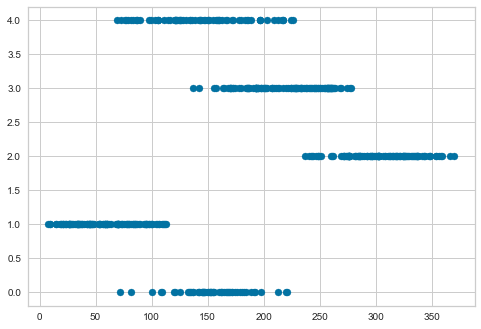

In [58]:
plt.scatter(students.total,students['class'])

## here we predict a student to which category does he/she belongs to from his data obtained from the application 

In [61]:
h=km.predict([[5,14,3,20,4]])
if(h==[1]):
    print("Dropout")
else:
    print("Not Dropout")

Dropout


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [67]:
h=km.predict([[70,40,13,20,1]])
if(h==[1]):
    print("Dropout")
else:
    print("Not Dropout")

Not Dropout


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
